# Hyrule Compendium Data Analysis Project

This project demonstrates how to scrape, clean, and analyze tabular data from the *Breath of the Wild Hyrule Compendium* Website.
I extract multiple tables containing game data, clean and format the data, and prepare it for presentation and analysis.

**Goals:**
- Find, Extract, and Parse multiple tables from HTML using BeautifulSoup and pandas
- Extract image URLs and Clean data
- Export to CSV and prepare for visualization
- Perform basic exploratory data analysis (EDA)

*Load HTML and Parse Tables*

In [40]:
from bs4 import BeautifulSoup
import pandas as pd

with open('../data/hyrule_compendium.html', 'r', encoding='utf-8') as f:
    soup = BeautifulSoup(f, 'html.parser')

tables_html = soup.find_all('table', class_='wikitable')
print(f"Found {len(tables_html)} tables.")

BASE_URL = 'https://www.zeldadungeon.net'

dfs = []

for table_html in tables_html:
    rows = []
    headers = [th.get_text(strip=True) for th in table_html.find_all('th')]

    for tr in table_html.find_all('tr')[1:]:  # skip header row
        cells = tr.find_all('td')
        if not cells:
            continue
        row = []
        for cell in cells:
            img = cell.find('img')
            if img and img.has_attr('src'):
                relative_url = img['src']
                img_url = BASE_URL + relative_url
                row.append(img_url)
            else:
                text = cell.get_text(strip=True)
                row.append(text)
        rows.append(row)

    df = pd.DataFrame(rows, columns=headers)
    dfs.append(df)

print(f"Parsed {len(dfs)} DataFrames.")


Found 7 tables.
Parsed 7 DataFrames.


*Preview and Save CSVs*

In [41]:
import os
import glob

output_dir = '../outputs'
os.makedirs(output_dir, exist_ok=True)

# Delete existing CSV files in outputs folder
csv_files = glob.glob(os.path.join(output_dir, '*.csv'))
for file in csv_files:
    os.remove(file)
print(f"Deleted {len(csv_files)} old CSV files in {output_dir}")

print(dfs[0].head(3))

# Save all tables separately as csv in the outputs folder
for i, df in enumerate(dfs, start=1):
    filename = os.path.join(output_dir, f'compendium_table_{i}.csv')
    df.to_csv(filename, index=False)
    print(f"Saved {filename}")



Deleted 7 old CSV files in ../outputs
     #                                              Image         Name  \
0  001  https://www.zeldadungeon.net/wiki/images/thumb...        Horse   
1  002  https://www.zeldadungeon.net/wiki/images/thumb...  Giant Horse   
2  003  https://www.zeldadungeon.net/wiki/images/thumb...  White Horse   

                                         Description  \
0  These can most often be found on plains. Their...   
1  This giant horse is the last of its kind. Its ...   
2  The Hyrulean royal family that perished 100 ye...   

                Common Locations Recoverable Materials  
0  Hyrule Field,Faron Grasslands                  None  
1                        Unknown                  None  
2                        Unknown               Unknown  
Saved ../outputs\compendium_table_1.csv
Saved ../outputs\compendium_table_2.csv
Saved ../outputs\compendium_table_3.csv
Saved ../outputs\compendium_table_4.csv
Saved ../outputs\compendium_table_5.csv
Saved ../out

**Data Visualization**

First, I imported the CSVs into Google Sheets to format the data and quickly scan for and fix any errors.

Next, I wanted to use Matplotlib and Seaborn to visualize trendlines and distribution curves of various attributes in our data.

In this example, we can look at the distribution of the length of the Description text in our "Animals" table.

Then, we can use Seaborn and construct a bar plot with common locations that the animals appear.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# This makes plots show directly in the notebook
%matplotlib inline  

# Optional: Set a nice style for seaborn plots
sns.set_style('whitegrid')

In [27]:
df = dfs[0]  # First table from your scraping
df.head(3)

,#,Image,Name,Description,Common Locations,Recoverable Materials
0,001,https://www.zeldadungeon.net/wiki/images/thumb...,Horse,These can most often be found on plains. Their...,"Hyrule Field,Faron Grasslands",None
1,002,https://www.zeldadungeon.net/wiki/images/thumb...,Giant Horse,This giant horse is the last of its kind. Its ...,Unknown,None
2,003,https://www.zeldadungeon.net/wiki/images/thumb...,White Horse,The Hyrulean royal family that perished 100 ye...,Unknown,Unknown


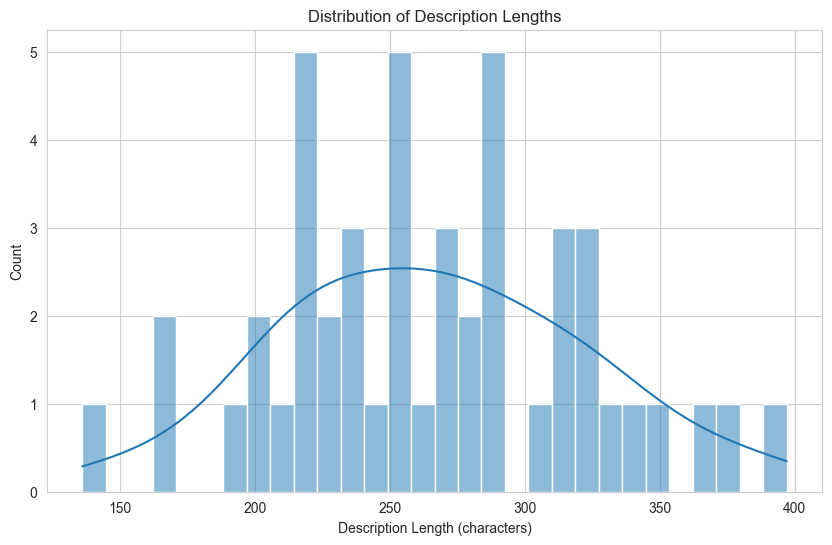

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# assuming your dataframe is dfs[0]
dfs[0]['Description Length'] = dfs[0]['Description'].str.len()

plt.figure(figsize=(10,6))
sns.histplot(dfs[0]['Description Length'], bins=30, kde=True)
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length (characters)')
plt.ylabel('Count')
plt.show()


C:\Users\Austin\AppData\Local\Temp\ipykernel_32004\2228290407.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


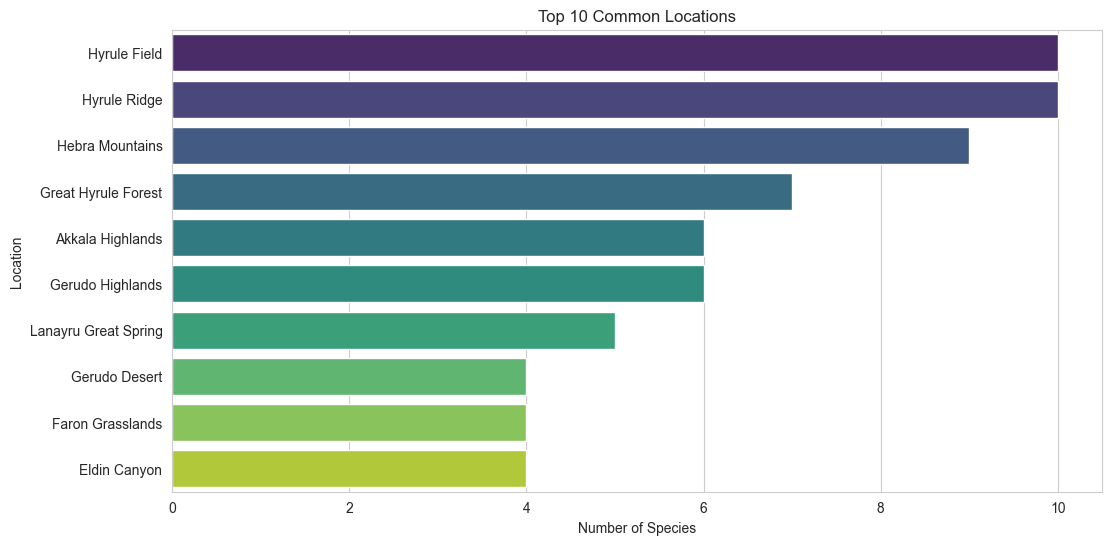

In [29]:
# First, get all locations in one big list
all_locations = df['Common Locations'].dropna().str.split(',').explode().str.strip()

# Count the top 10 most common locations
top_locations = all_locations.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title('Top 10 Common Locations')
plt.xlabel('Number of Species')
plt.ylabel('Location')
plt.show()

I was also interested in the relationship between a weapon's attack power and its location found.

For this, I use Matplotlib and Seaborn with NumPy to construct a bar graph and line-graph with trendline showing the relationship between these two attribtues. 

Given more data, I would have loved to demonstrate the change in mean attack power as you get farther and farther from (0, 0), or the starting point for the game.

In [30]:
weapons_df = dfs[4]  #index for the weapons table
print(weapons_df.columns)
weapons_df.head(3)

Index(['#', 'Image', 'Name', 'Description', 'Common Location', 'Properties'], dtype='object')


,#,Image,Name,Description,Common Location,Properties
0,201,https://www.zeldadungeon.net/wiki/images/thumb...,Master Sword,The legendary sword that seals the darkness. I...,Unknown,30 Attack
1,202,https://www.zeldadungeon.net/wiki/images/thumb...,Tree Branch,Wooden branches such as this are pretty common...,"Hyrule Field,West Necluda",2 Attack
2,203,https://www.zeldadungeon.net/wiki/images/thumb...,Torch,"This torch will stay lit once ignited, but if ...","Great Hyrule Forest,Hyrule Field",2 Attack


In [32]:
#Clean and prepare attack values
weapons_df = dfs[4]

# Rename columns for clarity
weapons_df.rename(columns={
    'Common Location': 'Location Found',
    'Properties': 'Attack'
}, inplace=True)

weapons_df['Attack'] = pd.to_numeric(
    weapons_df['Attack'].astype(str).str.extract(r'(\d+)', expand=False),
    errors='coerce'
)

# First, drop rows where Attack or Location Found is missing
weapons_clean = weapons_df.dropna(subset=['Attack', 'Location Found'])

# Split 'Location Found' by comma, strip whitespace, then explode into multiple rows
weapons_clean['Location Found'] = weapons_clean['Location Found'].str.split(',')

weapons_expanded = weapons_clean.explode('Location Found')

# Strip whitespace around location names
weapons_expanded['Location Found'] = weapons_expanded['Location Found'].str.strip()

# Filter out Unknown locations
weapons_expanded = weapons_expanded[weapons_expanded['Location Found'].str.lower() != 'unknown']


# Calculate mean attack per location
attack_by_location = weapons_expanded.groupby('Location Found')['Attack'].mean().reset_index()



C:\Users\Austin\AppData\Local\Temp\ipykernel_32004\2260952161.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weapons_clean['Location Found'] = weapons_clean['Location Found'].str.split(',')


C:\Users\Austin\AppData\Local\Temp\ipykernel_32004\3921103430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attack_by_location, x='Location Found', y='Attack', palette='plasma')


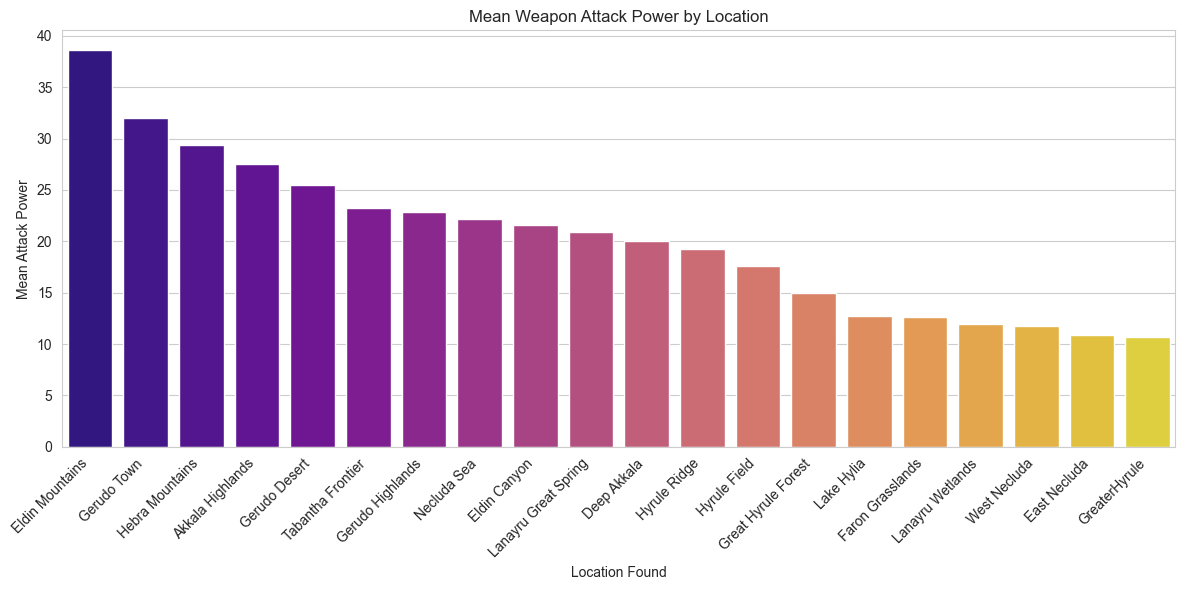

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

attack_by_location = attack_by_location.sort_values('Attack', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=attack_by_location, x='Location Found', y='Attack', palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Weapon Attack Power by Location')
plt.xlabel('Location Found')
plt.ylabel('Mean Attack Power')
plt.tight_layout()
plt.show()


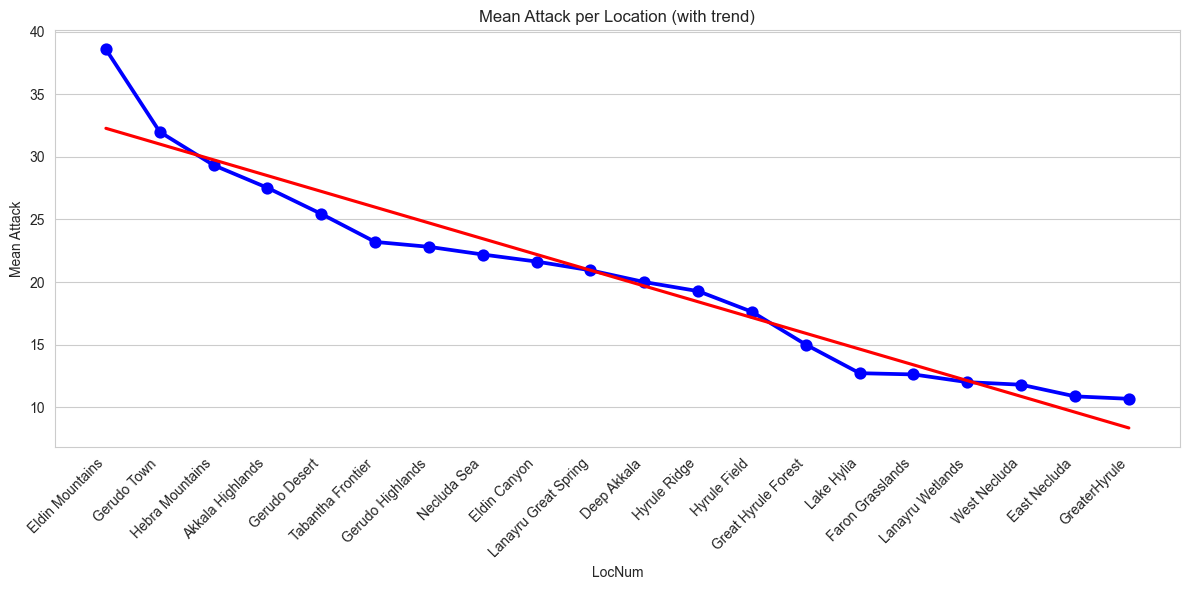

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create numeric mapping for locations
attack_by_location = attack_by_location.copy()
attack_by_location['LocNum'] = np.arange(len(attack_by_location))

plt.figure(figsize=(12,6))

# Plot points with categorical x-axis
sns.pointplot(data=attack_by_location, x='Location Found', y='Attack', color='blue')

# Overlay trendline using numeric x values
sns.regplot(x='LocNum', y='Attack', data=attack_by_location, scatter=False, color='red', ci=None)

plt.xticks(rotation=45, ha='right')
plt.title('Mean Attack per Location (with trend)')
plt.ylabel('Mean Attack')
plt.tight_layout()
plt.show()


Lastly, I wanted to find the relationship between a cooked-food's effect and which locations they were found the most. 

To do this, I at first thought a bar graph would be acceptable (showing each location for every effect) but that quickly became too visually distracting. 

I instead decided on a heatmap. This clealy demonstrates where each effect can be found and its frequency per location.

In [35]:
foods_df = dfs[1]  # index for cooking ingredients table

In [36]:
foods_df.rename(columns={
    'Common Locations': 'Location Found',
    'Cooking Effects': 'Cooking Effect' 
}, inplace=True)

In [37]:
# Drop rows missing either column
foods_clean = foods_df.dropna(subset=['Cooking Effect', 'Location Found'])

# Split 'Cooking Effects' and 'Location Found' by commas (or semicolons if that fits your data)
foods_clean['Cooking Effect'] = foods_clean['Cooking Effect'].str.split(',')
foods_clean['Location Found'] = foods_clean['Location Found'].str.split(',')

# Explode both columns separately and then merge exploded versions
foods_exploded_effects = foods_clean.explode('Cooking Effect')
foods_exploded = foods_exploded_effects.explode('Location Found')

# Strip whitespace
foods_exploded['Cooking Effect'] = foods_exploded['Cooking Effect'].str.strip()
foods_exploded['Location Found'] = foods_exploded['Location Found'].str.strip()


In [38]:
# Count occurrences of each (Effect, Location) pair
effect_location_counts = foods_exploded.groupby(['Cooking Effect', 'Location Found']).size().reset_index(name='Count')

# For each Cooking Effect, find the Location with max count
idx = effect_location_counts.groupby('Cooking Effect')['Count'].idxmax()
most_common_locations = effect_location_counts.loc[idx].reset_index(drop=True)

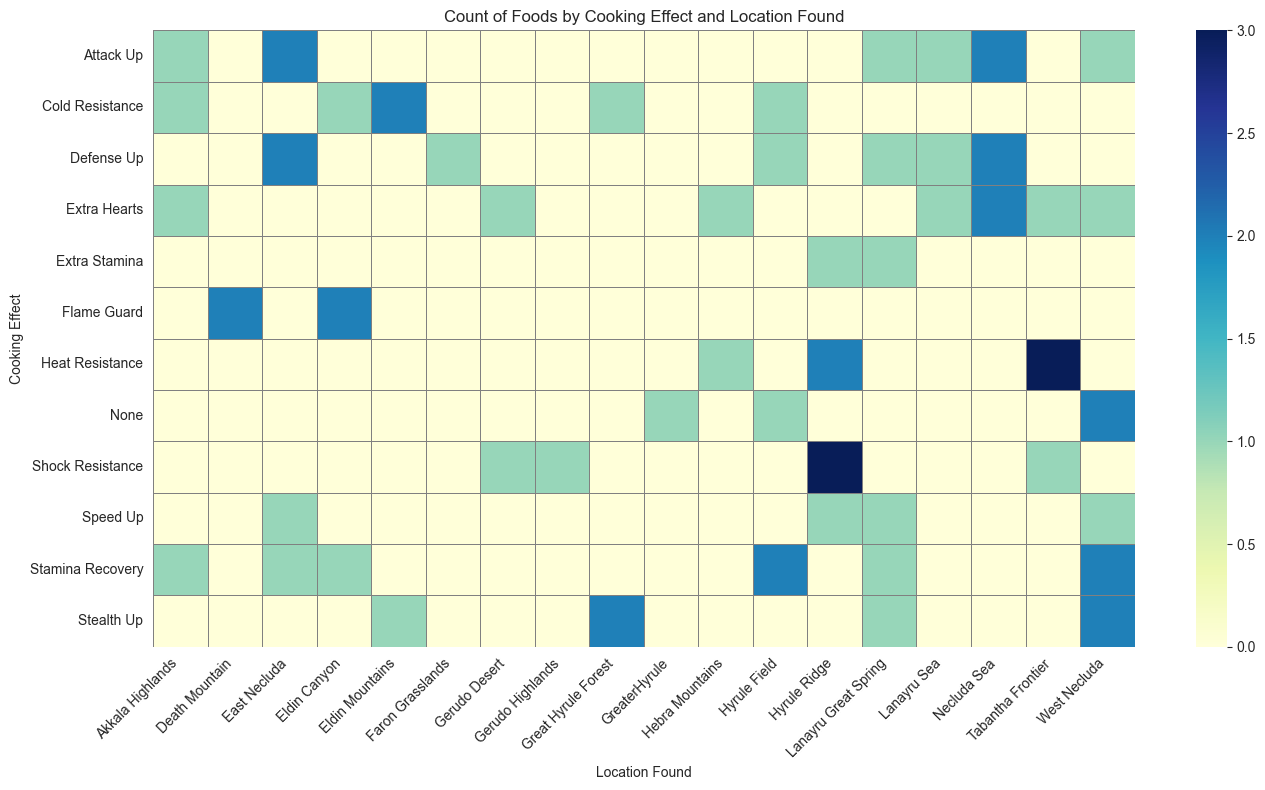

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group and count
effect_location_counts = foods_exploded.groupby(['Cooking Effect', 'Location Found']).size().reset_index(name='Count')

# Step 2: Pivot to create a matrix suitable for heatmap
heatmap_data = effect_location_counts.pivot(index='Cooking Effect', columns='Location Found', values='Count').fillna(0)

# Step 3: Plot heatmap
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title('Count of Foods by Cooking Effect and Location Found')
plt.xlabel('Location Found')
plt.ylabel('Cooking Effect')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Conclusion

In this notebook, I successfuly scraped and parsed multiple tables from the *Breath of the Wild Hyrule Compendium* Website, cleaned and transformed the HTML data, and performed exploratory data analysis using Python libraries such as pandas, matplotlib, and seaborn.

I visualized key insights such as description lengths, average weapon attack power by location, and the distribution of cooking effects across various regions using bar plots, trendlines, and heatmaps.

Future work could include a deeper statistical analysis across DataFrames, interactive visualizations with larger sets of data, and/or predictive modeling to show more complex relationships 

Overall, this project demonstrates the end-to-end workflow of data collection, cleaning, analysis, and visualization.